<a href="https://colab.research.google.com/github/ajagota7/Reward-Shaping/blob/main/gridworld_ope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Environment

In [5]:
class GridWorld:
    def __init__(self, height, width, start, end, bad_regions, good_regions, good_region_rewards, bad_region_rewards, final_reward):
        self.height = height
        self.width = width
        self.start = start
        self.end = end
        self.bad_regions = bad_regions
        self.good_regions = good_regions
        self.good_region_rewards = good_region_rewards
        self.bad_region_rewards = bad_region_rewards
        self.final_reward = final_reward

    def reset(self):
        self.agent_position = self.start

    def step(self, action):
        x, y = self.agent_position

        if action == "up" and y < self.height - 1:
            y += 1
        elif action == "down" and y > 0:
            y -= 1
        elif action == "left" and x > 0:
            x -= 1
        elif action == "right" and x < self.width - 1:
            x += 1

        self.agent_position = (x, y)

        if self.agent_position == self.end:
            reward = self.final_reward
            done = True
        elif self.agent_position in self.bad_regions:
            reward = self.bad_region_rewards
            done = False
        elif self.agent_position in self.good_regions:
            reward = self.good_region_rewards
            done = False
        else:
            reward = 0
            done = False

        return (x, y), reward, done


In [6]:
import numpy as np

class Agent:
    def __init__(self, epsilon=0.0):
        self.epsilon = epsilon

    def select_action(self, policy_func):
        if np.random.uniform() < self.epsilon:
            # Choose a random action
            action = np.random.choice(["up", "down", "left", "right"])
        else:
            # Use the provided policy function to get the best action
            action = policy_func()
        return action

# Define different policy functions outside the class

def random_policy():
    # Choose a random action
    return np.random.choice(["up", "down", "left", "right"])

# def behavior_policy(behav_policy):
#     action_probs = behav_policy
#     return np.random.choice(list(action_probs.keys()), p=list(action_probs.values()))

# def evaluation_policy(eval_policy):
#     action_probs = eval_policy
#     return np.random.choice(list(action_probs.keys()), p=list(action_probs.values()))

def run_policy(policy):
    action_probs = policy
    return np.random.choice(list(action_probs.keys()), p=list(action_probs.values()))


def manhattan_distance(pos1, pos2):
    # Compute the Manhattan distance between two positions
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

eval_policy = {"up": 0.4, "down": 0.1, "left": 0.1, "right": 0.4}
behav_policy = {"up": 0.25, "down": 0.25, "left": 0.25, "right": 0.25}

# Generating Policy data

In [7]:
# Gridworld environment
height = 5
width  = 5
start = (0,0)
end = (4,4)

In [9]:
def create_policy_set(env, policy_func, policy, num_episodes):
  # Create a list to store policies as trajectories
  policies = []

  # Run multiple episodes
  for episode in range(num_episodes):
      # Create a new Agent for each episode to generate a different policy
      agent = Agent(epsilon=0.0)

      # Run an episode
      env.reset()
      done = False
      trajectory = []  # Store the trajectory for the current episode
      cumulative_reward = 0.0  # Initialize cumulative reward
      while not done:
          state = env.agent_position  # Get the current state
          action = agent.select_action(lambda: policy_func(policy))
          next_state, reward, done = env.step(action)

          # Compute cumulative reward
          cumulative_reward += reward

          # Compute feature function values (manhattan distances)
          good_region_distances = [manhattan_distance(state, gr) for gr in env.good_regions]
          bad_region_distances = [manhattan_distance(state, br) for br in env.bad_regions]

          # Store the (state, action, reward, next_state) tuple in the trajectory
          trajectory.append((state, action, reward, next_state, cumulative_reward, good_region_distances, bad_region_distances))

      # Append the trajectory to the policies list
      policies.append(trajectory)

  return policies


In [10]:
def calc_V_pi_e(evaluation_policies):

  total_cumulative_reward = 0.0

  for episode_trajectory in evaluation_policies:
      total_cumulative_reward += episode_trajectory[-1][4]

  return total_cumulative_reward/len(evaluation_policies)

# Saving and Loading Data

In [11]:
def filename(env, behav_policy, eval_policy, num_episodes, train_split):
    good_regions_str = "_".join([f"gr_{pos[0]}_{pos[1]}" for pos in env.good_regions])
    bad_regions_str = "_".join([f"br_{pos[0]}_{pos[1]}" for pos in env.bad_regions])

    behav_probs_str = "_".join([f"{prob:.2f}" for prob in behav_policy.values()])
    eval_probs_str = "_".join([f"{prob:.2f}" for prob in eval_policy.values()])

    file = f"behav_{behav_probs_str}_eval_{eval_probs_str}_{good_regions_str}_{env.good_region_rewards}_{bad_regions_str}_{env.bad_region_rewards}_trajectories_{num_episodes}_train_split_{train_split}.txt"
    return file

In [48]:
# def filename(env, behav_policy, eval_policy, num_episodes, train_split):
#   good_regions_str = "_".join([f"gr_{pos[0]}_{pos[1]}" for pos in env.good_regions])
#   bad_regions_str = "_".join([f"br_{pos[0]}_{pos[1]}" for pos in env.bad_regions])
#   file = f"{policy.__name__}_{good_regions_str}_{env.good_region_rewards}_{bad_regions_str}_{env.bad_region_rewards}_trajectories_{num_episodes}_train_split_{train_split}.txt"
#   return file

In [49]:
# filename(env, behavior_policy, 1000)

'behavior_policy_gr_3_3_0.5_br_1_1_br_2_2_-1_trajectories_1000.txt'

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Define the path to your desired folder
folder_path = '/content/drive/MyDrive/gridworld_OPE_experiments'

# Change the working directory to the specified folder
os.chdir(folder_path)


In [12]:
import glob


# Change the working directory to the specified folder
os.chdir(folder_path)

# List all files (excluding subdirectories) in the folder
files = glob.glob('*')
print(files)


['behav_0.25_0.25_0.25_0.25_eval_0.40_0.10_0.10_0.40__0.5_br_1_1_br_2_2_-2_trajectories_200_train_split_0.3.txt', 'behav_0.25_0.25_0.25_0.25_eval_0.40_0.10_0.10_0.40__0.5_br_1_1_br_2_2_-2_trajectories_400_train_split_0.3.txt', 'behav_0.25_0.25_0.25_0.25_eval_0.40_0.10_0.10_0.40__0.5_br_1_1_br_2_2_-2_trajectories_600_train_split_0.3.txt', 'behav_0.25_0.25_0.25_0.25_eval_0.40_0.10_0.10_0.40__0.5_br_1_1_br_2_2_-2_trajectories_800_train_split_0.3.txt', 'behav_0.25_0.25_0.25_0.25_eval_0.40_0.10_0.10_0.40__0.5_br_1_1_br_2_2_-2_trajectories_1000_train_split_0.3.txt', 'behav_0.25_0.25_0.25_0.25_eval_0.40_0.10_0.10_0.40__0.5_br_2_2_-2_trajectories_200_train_split_0.3.txt', 'behav_0.25_0.25_0.25_0.25_eval_0.40_0.10_0.10_0.40__0.5_br_2_2_-2_trajectories_400_train_split_0.3.txt', 'behav_0.25_0.25_0.25_0.25_eval_0.40_0.10_0.10_0.40__0.5_br_2_2_-2_trajectories_1000_train_split_0.3.txt', 'behav_0.25_0.25_0.25_0.25_eval_0.40_0.10_0.10_0.40__0.5_br_2_2_-2_trajectories_600_train_split_0.3.txt', 'behav_0

In [13]:
import pickle

def save_data_to_file(data, filename):
    with open(filename, 'wb') as file:
        pickle.dump(data, file)

def load_data_from_file(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data


# Training Reward Models (Ignore this section for now)

## State -> Reward

Training model to predict rewards based on state only

In [ ]:
import tensorflow as tf
import numpy as np

# Step 1: Prepare the data
# behavior_policies = [...]  # Replace [...] with your actual behavior_policies list

# Initialize lists to store all 'next_state' and 'reward' values
all_next_states = []
all_rewards = []

# Extract the 'next_state' and 'reward' from the 'behavior_policies' list
for trajectory in behavior_policies:
    # For each trajectory, extract all 'next_state' and 'reward' values
    next_states = [state_action_reward[3] for state_action_reward in trajectory]
    rewards = [state_action_reward[2] for state_action_reward in trajectory]

    # Append the values to the corresponding lists
    all_next_states.extend(next_states)
    all_rewards.extend(rewards)

# Convert 'next_states' and 'rewards' into appropriate formats for training
all_next_states = np.array(all_next_states, dtype=np.float32)
all_rewards = np.array(all_rewards, dtype=np.float32)

# Now, 'all_next_states' contains all the 'next_state' values, and 'all_rewards' contains all the corresponding rewards.


In [ ]:
# Step 2: Design the neural network
class RewardPredictorStates(tf.keras.Model):
    def __init__(self, input_shape):
        super(RewardPredictorStates, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return x

# Define hyperparameters for the neural network
input_shape = all_next_states.shape[1:]  # Shape of the input state (excluding batch size)
learning_rate = 0.005
num_epochs = 1000
batch_size = 32

# Create the neural network
reward_predictor_states = RewardPredictorStates(input_shape)

# Compile the model
reward_predictor_states.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                         loss='mean_squared_error')

# Step 3: Train the neural network with early stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)
]

reward_predictor_states.fit(
    all_next_states, all_rewards,
    batch_size=batch_size, epochs=num_epochs,
    callbacks=callbacks, validation_split=0.2, verbose=1
)

In [ ]:
current_state = behavior_policies[0][5][0]
current_state = np.array(current_state, dtype=np.float32)
predicted_reward_current = reward_predictor_states.predict(np.expand_dims(current_state, axis=0))
print("Predicted Reward Current State:", predicted_reward_current[0, 0])

new_state = behavior_policies[0][5][3]  # Replace ... with the new state for which you want to predict the reward
new_state = np.array(new_state, dtype=np.float32)
predicted_reward_next = reward_predictor_states.predict(np.expand_dims(new_state, axis=0))
print("Predicted Reward Next State:", predicted_reward_next[0, 0])

1/1 [==============================] - 0s 20ms/step
Predicted Reward Current State: -0.03829813
1/1 [==============================] - 0s 20ms/step
Predicted Reward Next State: -0.006269932


## State -> Cumulative Reward

Reward model based on State -> Cumulative Rewards

In [ ]:
import tensorflow as tf
import numpy as np

# Step 1: Prepare the data
# behavior_policies = [...]  # Replace [...] with your actual behavior_policies list

# Initialize lists to store all 'next_state' and 'reward' values
all_next_states = []
all_cum_rewards = []

# Extract the 'next_state' and 'reward' from the 'behavior_policies' list
for trajectory in behavior_policies:
    # For each trajectory, extract all 'next_state' and 'reward' values
    next_states = [state_action_reward[3] for state_action_reward in trajectory]
    cum_rewards = [state_action_reward[4] for state_action_reward in trajectory]

    # Append the values to the corresponding lists
    all_next_states.extend(next_states)
    all_cum_rewards.extend(cum_rewards)

# Convert 'next_states' and 'rewards' into appropriate formats for training
all_next_states = np.array(all_next_states, dtype=np.float32)
all_cum_rewards = np.array(all_cum_rewards, dtype=np.float32)

# Now, 'all_next_states' contains all the 'next_state' values, and 'all_rewards' contains all the corresponding rewards.


In [ ]:
# Step 2: Design the neural network
# import tensorflow as tf

class RewardPredictorCumulative(tf.keras.Model):
    def __init__(self, input_shape):
        super(RewardPredictorCumulative, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.batch_norm1 = tf.keras.layers.BatchNormalization()
        self.dense2 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.batch_norm2 = tf.keras.layers.BatchNormalization()
        self.dense3 = tf.keras.layers.Dense(1, kernel_initializer='he_normal')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.batch_norm1(x)
        x = self.dense2(x)
        x = self.batch_norm2(x)
        x = self.dense3(x)
        return x


# Define hyperparameters for the neural network
input_shape = all_next_states.shape[1:]  # Shape of the input state (excluding batch size)
learning_rate = 0.0001
num_epochs = 1000
batch_size = 32

# Create the neural network
reward_predictor_cumulative = RewardPredictorCumulative(input_shape)

# Compile the model
reward_predictor_cumulative.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                         loss='mean_squared_error')

# Step 3: Train the neural network with early stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)
]

reward_predictor_cumulative.fit(
    all_next_states, all_cum_rewards,
    batch_size=batch_size, epochs=num_epochs,
    callbacks=callbacks, validation_split=0.2, verbose=1
)

## State -> Rewards over past 3 timesteps

Cumulative rewards over 3 timesteps

In [ ]:
# Discounted sum
# Create a new list to store trajectories with the new data
augmented_behavior_policies = []

# Set the discount factor (gamma)
discount_factor = 0.9  # You can adjust this value as needed (usually between 0 and 1)

# Iterate through each trajectory in behavior_policies
for trajectory in behavior_policies:
    num_timesteps = len(trajectory)
    new_trajectory = []

    # Iterate through each timestep in the trajectory
    for t in range(num_timesteps):
        # Calculate the discounted sum of the past 3 rewards for the past 3 timesteps
        discounted_sum = 0.0
        for i in range(1, min(4, t + 1)):
            discounted_sum += (discount_factor ** (i - 1)) * trajectory[t - i][2]

        # Update the trajectory to include only the discounted sum of the past 3 rewards
        state, action, reward, next_state, cumulative_reward, good_prox, bad_prox = trajectory[t]
        new_trajectory.append((state, discounted_sum, action, reward, next_state, cumulative_reward))

    # Append the modified trajectory to the augmented_behavior_policies list
    augmented_behavior_policies.append(new_trajectory)


In [ ]:
# Discounted sum
# Create a new list to store trajectories with the new data
augmented_evaluation_policies = []

# Set the discount factor (gamma)
discount_factor = 0.9  # You can adjust this value as needed (usually between 0 and 1)

# Iterate through each trajectory in evaluation_policies
for trajectory in evaluation_policies:
    num_timesteps = len(trajectory)
    new_trajectory = []

    # Iterate through each timestep in the trajectory
    for t in range(num_timesteps):
        # Calculate the discounted sum of the past 3 rewards for the past 3 timesteps
        discounted_sum = 0.0
        for i in range(1, min(4, t + 1)):
            discounted_sum += (discount_factor ** (i - 1)) * trajectory[t - i][2]

        # Update the trajectory to include only the discounted sum of the past 3 rewards
        state, action, reward, next_state, cumulative_reward, good_prox. bad_prox = trajectory[t]
        new_trajectory.append((state, discounted_sum, action, reward, next_state, cumulative_reward))

    # Append the modified trajectory to the augmented_evaluation_policies list
    augmented_evaluation_policies.append(new_trajectory)


In [ ]:
import tensorflow as tf
import numpy as np

# Step 1: Prepare the data
def preprocess_nstep_data(policy_data):
  # Initialize lists to store all 'next_state' and 'reward' values
  all_next_states = []
  all_past3_rewards = []

  # Extract the 'next_state' and 'reward' from the 'behavior_policies' list
  for trajectory in policy_data:
      # For each trajectory, extract all 'next_state' and 'reward' values
      next_states = [state_action_reward[4] for state_action_reward in trajectory]
      rewards = [state_action_reward[3] for state_action_reward in trajectory]

      # Append the values to the corresponding lists
      all_next_states.extend(next_states)
      all_past3_rewards.extend(rewards)

  # Convert 'next_states' and 'rewards' into appropriate formats for training
  all_next_states = np.array(all_next_states, dtype=np.float32)
  all_past3_rewards = np.array(all_past3_rewards, dtype=np.float32)
  return all_next_states, all_past3_rewards

In [ ]:
# Step 2: Design the neural network
class RewardPredictor3States(tf.keras.Model):
    def __init__(self, input_shape):
        super(RewardPredictor3States, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return x


In [ ]:
# Behavior policies training
all_next_states_behav, all_past3_rewards_behav = preprocess_nstep_data(augmented_behavior_policies)

# Define hyperparameters for the neural network
input_shape = all_next_states_behav.shape[1:]  # Shape of the input state (excluding batch size)
learning_rate = 0.005
num_epochs = 1000
batch_size = 32

# Create the neural network
reward_predictor_3states = RewardPredictor3States(input_shape)

# Compile the model
reward_predictor_3states.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                         loss='mean_squared_error')

# Step 3: Train the neural network with early stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)
]

reward_predictor_3states.fit(
    all_next_states_behav, all_past3_rewards_behav,
    batch_size=batch_size, epochs=num_epochs,
    callbacks=callbacks, validation_split=0.2, verbose=1
)

Epoch 1/1000
541/541 [==============================] - 2s 2ms/step - loss: 0.1163 - val_loss: 0.0807
Epoch 2/1000
541/541 [==============================] - 1s 2ms/step - loss: 0.0498 - val_loss: 0.0302
Epoch 3/1000
541/541 [==============================] - 1s 2ms/step - loss: 0.0184 - val_loss: 0.0124
Epoch 4/1000
541/541 [==============================] - 1s 2ms/step - loss: 0.0085 - val_loss: 0.0050
Epoch 5/1000
541/541 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 6/1000
541/541 [==============================] - 1s 2ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/1000
541/541 [==============================] - 1s 2ms/step - loss: 8.8721e-04 - val_loss: 6.9921e-04
Epoch 8/1000
541/541 [==============================] - 1s 2ms/step - loss: 5.3470e-04 - val_loss: 2.7174e-04
Epoch 9/1000
541/541 [==============================] - 1s 2ms/step - loss: 3.5016e-04 - val_loss: 4.5576e-04
Epoch 10/1000
541/541 [==============================] - 1

In [ ]:
current_state = [2,3]
current_state = np.array(current_state, dtype=np.float32)
predicted_reward_current = reward_predictor_3states.predict(np.expand_dims(current_state, axis=0))
print("Predicted Reward Current State:", predicted_reward_current[0, 0])

1/1 [==============================] - 0s 23ms/step
Predicted Reward Current State: 0.0006133178


In [ ]:
# Evaluation policies training
all_next_states_eval, all_past3_rewards_eval = preprocess_nstep_data(augmented_evaluation_policies)

# Define hyperparameters for the neural network
input_shape = all_next_states_eval.shape[1:]  # Shape of the input state (excluding batch size)
learning_rate = 0.005
num_epochs = 1000
batch_size = 32

# Create the neural network
reward_predictor_3states_eval = RewardPredictor3States(input_shape)

# Compile the model
reward_predictor_3states_eval.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                         loss='mean_squared_error')

# Step 3: Train the neural network with early stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)
]

reward_predictor_3states_eval.fit(
    all_next_states_eval, all_past3_rewards_eval,
    batch_size=batch_size, epochs=num_epochs,
    callbacks=callbacks, validation_split=0.2, verbose=1
)

In [ ]:
current_state = [4,3]
current_state = np.array(current_state, dtype=np.float32)
predicted_reward_current = reward_predictor_3states_eval.predict(np.expand_dims(current_state, axis=0))
print("Predicted Reward Current State:", predicted_reward_current[0, 0])

State, action, Next State -> Reward

In [ ]:

# import tensorflow as tf
# import numpy as np

# # Step 1: Prepare the data
# behavior_policies = [...]  # Replace [...] with your actual behavior_policies list

# # Initialize lists to store all 'current_state', 'action', 'next_state', and 'reward' values
# all_current_states = []
# all_actions = []
# all_next_states = []
# all_rewards = []

# # Extract the 'current_state', 'action', 'next_state', and 'reward' from the 'behavior_policies' list
# for trajectory in behavior_policies:
#     for state, action, reward, next_state in trajectory:
#         all_current_states.append(state)
#         all_actions.append(action)
#         all_next_states.append(next_state)
#         all_rewards.append(reward)

# # Convert 'current_states', 'actions', 'next_states', and 'rewards' into appropriate formats for training
# all_current_states = np.array(all_current_states, dtype=np.float32)
# all_actions = np.array(all_actions, dtype=np.float32)
# all_next_states = np.array(all_next_states, dtype=np.float32)
# all_rewards = np.array(all_rewards, dtype=np.float32)

## State + proximity to good/bad regions -> Cumulative Reward

# OPE Calculations

## Importance Weights

In [14]:
def calculate_importance_weights(eval_policy, behav_policy, behavior_policies):
  all_weights = []
  for trajectory in behavior_policies:
    cum_ratio = 1
    cumul_weights = []
    for step in trajectory:
        ratio = eval_policy[step[1]]/behav_policy[step[1]]
        # print("Ratio:",ratio)
        cum_ratio *= ratio
        cumul_weights.append(cum_ratio)
        # print("Cumul:",cum_ratio)
    all_weights.append(cumul_weights)

  return all_weights

## IS

In [15]:
import numpy as np

def per_step_IS(scope_set, num_bootstraps):
    all_timesteps = []
    gamma = 0.9
    # scope_set,_ = subset_policies(scope_set, phi_trajectories)
    scope_weights = calculate_importance_weights(eval_policy, behav_policy, scope_set)
    for j in range(len(scope_weights)):
        Timestep_values = []
        for i in range(len(scope_weights[j]) - 1):
            timestep = gamma ** (i) * scope_weights[j][i] * scope_set[j][i][2]
            Timestep_values.append(timestep)

        all_timesteps.append(Timestep_values)

    V_per_traj = [sum(sublist) for sublist in all_timesteps]

    seed_value = 42
    np.random.seed(seed_value)

    num_trajectories_to_sample = max(1, len(V_per_traj))

    bootstrap_samples = [np.random.choice(V_per_traj, size=num_trajectories_to_sample, replace=True)
                         for _ in range(num_bootstraps)]

    V_per_sample = [sum(sample) / len(scope_set) for sample in bootstrap_samples]
    V_per_sample = np.array(V_per_sample)

    std_deviation = np.std(V_per_sample)
    quartiles = np.percentile(V_per_sample, [25, 50, 75])
    max_value = np.max(V_per_sample)
    min_value = np.min(V_per_sample)

    return {
        'std_deviation': std_deviation,
        'quartiles': quartiles,
        'max_value': max_value,
        'min_value': min_value
    }


## SCOPE

In [16]:
import numpy as np

def SCOPE(scope_policies, beta, num_bootstraps):
    all_timesteps = []
    gamma = 0.9
    # scope_policies,_ = subset_policies(scope_policies, phi_trajectories)
    scope_weights = calculate_importance_weights(eval_policy, behav_policy, scope_policies)
    for j in range(len(scope_weights)):
        Timestep_values = []
        for i in range(len(scope_weights[j]) - 1):
            features = scope_policies[j][i][5] + scope_policies[j][i][6]
            features_next = scope_policies[j][i + 1][5] + scope_policies[j][i + 1][6]
            timestep = gamma ** (i) * scope_weights[j][i] * (scope_policies[j][i][2] + gamma * phi(features_next, beta) - phi(features, beta))
            Timestep_values.append(timestep)

        all_timesteps.append(Timestep_values)

    V_per_traj = [sum(sublist) for sublist in all_timesteps]

    seed_value = 42
    np.random.seed(seed_value)

    num_trajectories_to_sample = max(1, len(V_per_traj))

    bootstrap_samples = [np.random.choice(V_per_traj, size=num_trajectories_to_sample, replace=True)
                         for _ in range(num_bootstraps)]

    V_per_sample = [sum(sample)/len(scope_policies) for sample in bootstrap_samples]
    V_per_sample = np.array(V_per_sample)

    std_deviation = np.std(V_per_sample)
    quartiles = np.percentile(V_per_sample, [25, 50, 75])
    max_value = np.max(V_per_sample)
    min_value = np.min(V_per_sample)

    return {
        'std_deviation': std_deviation,
        'quartiles': quartiles,
        'max_value': max_value,
        'min_value': min_value
    }


# Variance Preparation and Calculation

In [17]:
def phi(features, beta):
  features = np.array(features)
  beta = np.array(beta)
  phi_s = np.dot(beta,features)
  return phi_s


In [18]:
import random
# gamma = 0.9
# beta = [random.random() for _ in range(3)]
def variance_terms(policy_set,gamma, beta):
  all_weights = calculate_importance_weights(eval_policy, behav_policy, policy_set)
  y_w_r_all = 0
  r_all = 0
  f_a = 0
  for j in range(len(policy_set)):
    y_w_r = 0
    r = 0
    for i in range(len(policy_set[j])):
      features = policy_set[j][i][5]+policy_set[j][i][6]
      y_w_r += gamma**(i)*all_weights[j][i]*policy_set[j][i][2]
      if i>0 & i<len(policy_set):
        r += phi(features, beta)*(all_weights[j][i-1]-all_weights[j][i])
    y_w_r_all += y_w_r
    f_a +=  gamma**(len(policy_set[j]))*all_weights[j][-1]*phi(features,beta) - phi(features, beta) # fix the features part
    r_all += r

  IS = y_w_r_all/len(policy_set)
  R = r_all/len(policy_set)
  F = f_a/len(policy_set)
  return IS, R, F


In [19]:

def subset_policies(policies, percent_to_estimate_phi):
    seed_value = 42
    np.random.seed(seed_value)
    num_policies = len(policies)
    num_policies_to_estimate_phi = int(num_policies * percent_to_estimate_phi)

    policies_for_scope = policies[num_policies_to_estimate_phi:]
    policies_for_phi = policies[:num_policies_to_estimate_phi]

    return policies_for_scope, policies_for_phi


In [20]:

def calc_variance(phi_policies, gamma, beta, num_bootstrap_samples):
  # Set the seed value (you can use any integer value)
  seed_value = 42
  np.random.seed(seed_value)
  # _, phi_policies = subset_policies(phi_policies, percent_to_estimate_phi=phi_trajectories)
  num_trajectories_to_sample = max(1, len(phi_policies))

  bootstrap_samples = [np.random.choice(phi_policies, size=num_trajectories_to_sample, replace=True)
                         for _ in range(num_bootstrap_samples)]
  IS_all = []
  R_all = []
  F_all = []

  for pol in bootstrap_samples:
    IS, R, F = variance_terms(pol,0.9,beta)
    IS_all.append(IS)
    R_all.append(R)
    F_all.append(F)
  IS_sq = np.mean([num**2 for num in IS_all])
  IS_R_F = 2*np.mean([IS_all[i]*(R_all[i]+F_all[i]) for i in range(len(IS_all))])
  R_sq = np.mean([num**2 for num in R_all])
  IS_sq_all = (np.mean(IS_all))**2
  IS_r_t_f = 2*np.mean(IS_all)*np.mean([R_all[i]+F_all[i] for i in range(len(R_all))])
  R_sq_all = (np.mean(R_all))**2

  variance_scope = IS_sq + IS_R_F + R_sq - IS_sq_all - IS_r_t_f - R_sq_all
  variance_is = IS_sq - IS_sq_all
  return variance_scope, variance_is

In [217]:
pi_b = create_policy_set(env_bad_one, run_policy, behav_policy, 200)

In [223]:
pi_b[1][-1]

((4, 3), 'up', 3, (4, 4), 1.0, [], [3])

An example of an initial guess of phi can be seen below, as you can see the SCOPE variance is not ideal.

In [58]:
scope_set, phi_set = subset_policies(behavior_policies, 0.3)
variance_scope, variance_is = calc_variance(phi_set,0.9,[-0.1,.1,.1], 100, 0.3)
print("Var SCOPE: ",variance_scope)
print("Var IS: ",variance_is)
print("Percent change in variance: ",((variance_scope-variance_is)/variance_is)*100)

Var SCOPE:  0.7292656998003821
Var IS:  0.3796743263659492
Percent change in variance:  92.07664283770379


# Optimization

Here we aim to optimize beta to minimize SCOPE variance.

In [21]:
import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

from scipy.optimize import minimize

# Define the objective function to minimize variance_scope
def objective_function(beta, phi_set):
    # scope_set, phi_set = subset_policies(phi_set, phi_trajectories)
    variance_scope, variance_is = calc_variance(phi_set, 0.9, beta, 100)
    return variance_scope

# Set the initial values of beta
initial_beta = np.array([ 0.2610704,   0.30396575, -0.43850237])


def optimize_variance_scope(initial_beta, phi_set, phi_trajectories):
    # Lists to store beta and variance_scope values at each iteration
    all_betas = []
    all_variance_scopes = []

    # Callback function to record beta and variance_scope values at each iteration
    def callback_function(beta):
        all_betas.append(beta.copy())
        variance_scope = objective_function(beta, phi_set)
        all_variance_scopes.append(variance_scope)
        print("Iteration:", len(all_betas))
        print("Beta:", beta)
        print("Variance Scope:", variance_scope)
        print("----------")

    # Run the optimization with the callback
    result = minimize(
        objective_function,
        initial_beta,
        args=(phi_set),
        method='L-BFGS-B',
        callback=callback_function
    )

    # Extract the optimal beta values
    optimal_beta = result.x

    return optimal_beta


In [61]:
optimal_beta = optimize_variance_scope(initial_beta, behavior_policies, 0.3)

Iteration: 1
Beta: [ 0.16821737  0.35271354 -0.42156545]
Variance Scope: 0.11317799047435423
----------
Iteration: 2
Beta: [ 0.15853249  0.34137881 -0.42710298]
Variance Scope: 0.11040088606596254
----------
Iteration: 3
Beta: [ 0.15073224  0.32968859 -0.42471605]
Variance Scope: 0.1093933569252897
----------
Iteration: 4
Beta: [ 0.14615259  0.3202478  -0.4164246 ]
Variance Scope: 0.10883472336459371
----------
Iteration: 5
Beta: [ 0.14331703  0.31081431 -0.40169853]
Variance Scope: 0.108436847289928
----------
Iteration: 6
Beta: [ 0.14352606  0.31073858 -0.40072254]
Variance Scope: 0.10843321214844745
----------
Iteration: 7
Beta: [ 0.14356653  0.31079481 -0.40072313]
Variance Scope: 0.10843319408861363
----------
Iteration: 8
Beta: [ 0.14356994  0.31080162 -0.40072872]
Variance Scope: 0.10843319398401882
----------


# Value estimates of IS and SCOPE estimators

In [ ]:
# all_weights = calculate_importance_weights(eval_policy, behav_policy, behavior_policies)
beta =  [ 0.2609209,   0.47456879, -0.52815694]
# beta = [0,0,0]
V_per_sample, scope_std, scope_quartiles, scope_max_value, scope_min_value = SCOPE(behavior_policies,optimal_beta,0.3,300)
print("SCOPE Std Dev: ", scope_std)
print("SCOPE quartiles: ",scope_quartiles)
print("SCOPE max: ",scope_max_value)
print("SCOPE min",scope_min_value)

In [51]:
IS_per_traj, is_std, is_quartiles, is_max_value, is_min_value = per_step_IS(behavior_policies,0.3,300)
print("IS std dev: ",is_std)
print("IS quartiles: ",is_quartiles)
print("IS max: ",is_max_value)
print("IS min: ", is_min_value)

IS std dev:  0.10933610817754
IS quartiles:  [-0.84036769 -0.77909955 -0.69050267]
IS max:  -0.5479659789843923
IS min:  -1.0898425977186181


# Assimilation (Ignore for now)

In [24]:
env = GridWorld(height, width, start, end, [(1, 1), (2, 2)], [(3,3)], 0.5, -2, 3)

# Number of episodes
num_episodes = 100

In [37]:
behavior_policies_1000, filename = create_policy_set(env, behavior_policy, num_episodes)

In [38]:
scope_set, phi_set = subset_policies(behavior_policies_1000, 0.3)
variance_scope, variance_is = calc_variance(phi_set,0.9,[-0.1,.1,.1], 100, 0.3)
print("Var SCOPE: ",variance_scope)
print("Var IS: ",variance_is)
print("Percent change in variance: ",((variance_scope-variance_is)/variance_is)*100)

Var SCOPE:  0.032392092704986115
Var IS:  0.0184793990245945
Percent change in variance:  75.28758733914998


In [39]:
initial_beta = [-0.1,.1,.1]
optimal_beta = optimize_variance_scope(initial_beta, behavior_policies_1000, 0.3)

Iteration: 1
Beta: [-0.06523181  0.02304533  0.05253761]
Variance Scope: 0.02084052183274824
----------
Iteration: 2
Beta: [-0.02091298  0.02012022  0.04768606]
Variance Scope: 0.01692647175961828
----------
Iteration: 3
Beta: [0.04789626 0.02635576 0.02143015]
Variance Scope: 0.014199863342526705
----------
Iteration: 4
Beta: [ 0.0614707   0.03860064 -0.00288591]
Variance Scope: 0.013542628515201995
----------
Iteration: 5
Beta: [ 0.12437417  0.14081556 -0.19456702]
Variance Scope: 0.010246852619742673
----------
Iteration: 6
Beta: [ 0.12737027  0.19524445 -0.28980009]
Variance Scope: 0.00932164732044462
----------
Iteration: 7
Beta: [ 0.12140381  0.20291535 -0.30178977]
Variance Scope: 0.00926777196071786
----------
Iteration: 8
Beta: [ 0.12023918  0.20215579 -0.3002091 ]
Variance Scope: 0.009267233371063562
----------
Iteration: 9
Beta: [ 0.12012512  0.20199007 -0.29989563]
Variance Scope: 0.009267227627684869
----------


In [41]:
variance_scope, variance_is = calc_variance(phi_set,0.9,optimal_beta, 300, 0.3)
print("Var SCOPE: ",variance_scope)
print("Var IS: ",variance_is)
print("Percent change in variance: ",((variance_scope-variance_is)/variance_is)*100)

Var SCOPE:  0.00878962726137877
Var IS:  0.015733865317291262
Percent change in variance:  -44.13561395038057


In [46]:
V_per_traj, scope_std, scope_quartiles, scope_max_value, scope_min_value = SCOPE(behavior_policies_1000,optimal_beta,0.3,10000)
print("SCOPE Std Dev: ", scope_std)
print("SCOPE quartiles: ",scope_quartiles)
print("SCOPE max: ",scope_max_value)
print("SCOPE min",scope_min_value)


SCOPE Std Dev:  0.0847273731246662
SCOPE quartiles:  [-0.73940798 -0.67815197 -0.6243099 ]
SCOPE max:  -0.4319544216644854
SCOPE min -1.0604403679851322


In [44]:
at, IS_per_traj, is_std, is_quartiles, is_max_value, is_min_value = per_step_IS(behavior_policies_1000,0.3,1000)
print("IS std dev: ",is_std)
print("IS quartiles: ",is_quartiles)
print("IS max: ",is_max_value)
print("IS min: ", is_min_value)

IS std dev:  0.055378959467358886
IS quartiles:  [-0.8130771  -0.77558457 -0.74007423]
IS max:  -0.6024242140435747
IS min:  -0.93931194204315


In [71]:
env_bad = GridWorld(height, width, start, end, [(1, 1), (2, 2)], [])

# Number of episodes
num_episodes = 1000


In [50]:
behavior_policies_bad_1000, filename = create_policy_set(env_bad, behavior_policy, num_episodes)

In [53]:
scope_set, phi_set = subset_policies(behavior_policies_bad_1000, 0.3)
variance_scope, variance_is = calc_variance(phi_set,0.9,[-0.1,.1], 100, 0.3)
print("Var SCOPE: ",variance_scope)
print("Var IS: ",variance_is)
print("Percent change in variance: ",((variance_scope-variance_is)/variance_is)*100)

Var SCOPE:  0.4941626782271849
Var IS:  0.39076410364829994
Percent change in variance:  26.460612326854605


In [54]:
initial_beta = [-0.1,.1]
optimal_beta = optimize_variance_scope(initial_beta, behavior_policies_bad_1000, 0.3)

Iteration: 1
Beta: [0.06354653 0.16516067]
Variance Scope: 0.3081369785991253
----------
Iteration: 2
Beta: [0.09808462 0.09657364]
Variance Scope: 0.29495541572903466
----------
Iteration: 3
Beta: [ 0.31395925 -0.33211788]
Variance Scope: 0.25681217412820095
----------


In [62]:
variance_scope, variance_is = calc_variance(behavior_policies_bad_1000,0.9,optimal_beta, 300, 0.3)
print("Var SCOPE: ",variance_scope)
print("Var IS: ",variance_is)
print("Percent change in variance: ",((variance_scope-variance_is)/variance_is)*100)

Var SCOPE:  0.03902754903340479
Var IS:  0.03555696106170689
Percent change in variance:  9.760642833550683


In [57]:
V_per_traj, scope_std, scope_quartiles, scope_max_value, scope_min_value = SCOPE(behavior_policies_bad_1000,optimal_beta,0.3,10000)
print("SCOPE Std Dev: ", scope_std)
print("SCOPE quartiles: ",scope_quartiles)
print("SCOPE max: ",scope_max_value)
print("SCOPE min",scope_min_value)


SCOPE Std Dev:  0.03854389393810322
SCOPE quartiles:  [-0.00872616  0.01719359  0.04284018]
SCOPE max:  0.17204384949003806
SCOPE min -0.11922521511670789


In [58]:
at, IS_per_traj, is_std, is_quartiles, is_max_value, is_min_value = per_step_IS(behavior_policies_1000,0.3,1000)
print("IS std dev: ",is_std)
print("IS quartiles: ",is_quartiles)
print("IS max: ",is_max_value)
print("IS min: ", is_min_value)

IS std dev:  0.055378959467358886
IS quartiles:  [-0.8130771  -0.77558457 -0.74007423]
IS max:  -0.6024242140435747
IS min:  -0.93931194204315


# Experiments

In [25]:
import random
import os
def run_experiment(env, num_episodes, behav_policy, eval_policy, phi_traj):
  file = filename(env, behav_policy, eval_policy, num_episodes, phi_traj)
  # Check if the file already exists
  if os.path.exists(file):
    loaded_data = load_data_from_file(file)
    return loaded_data
  behavior_policies = create_policy_set(env, run_policy,behav_policy, num_episodes)
  initial_beta = [random.uniform(-0.5, 0.5) for _ in range(len(env.good_regions + env.bad_regions))]
  scope_set, phi_set = subset_policies(behavior_policies, phi_traj)
  optimal_beta = optimize_variance_scope(initial_beta, phi_set, phi_traj)
  variance_scope, variance_is = calc_variance(phi_set,0.9,optimal_beta, 500)
  print("Var SCOPE_phi: ",variance_scope)
  print("Var IS_phi: ",variance_is)
  print("Percent change in variance: ",((variance_scope-variance_is)/variance_is)*100)
  scope_results = SCOPE(scope_set,optimal_beta,500)
  IS_results = per_step_IS(scope_set,500)
  print("SCOPE results: ", scope_results)
  print("IS results: ", IS_results)
  evaluation_policies = create_policy_set(env, run_policy,eval_policy, 1000)
  true_evaluation = calc_V_pi_e(evaluation_policies)
  print("true eval: ", true_evaluation)
  data_to_save = {
    'policy_set': behavior_policies,
    'optimal_beta': optimal_beta,
    'variance_scope_train': variance_scope,
    'variance_IS_train': variance_is,
    'scope_results': scope_results,
    'IS_results': IS_results,
    'True Evaluation': true_evaluation
  }
  save_data_to_file(data_to_save, file)

  return data_to_save



## Plotting functions

In [77]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_rewards_over_trajectories(env, num_trajectories, behav_policy, eval_policy, phi_traj):
    combined_scope = []
    combined_is = []

    for i in range(len(num_trajectories)):
        results = run_experiment(env, num_trajectories[i], behav_policy, eval_policy, phi_traj)
        if num_trajectories[i] == 1000:
            true_val = results['True Evaluation']

        scope_results = results['scope_results']
        is_results = results['IS_results']

        min_scope = scope_results['min_value']
        min_is = is_results['min_value']

        quartiles_scope = scope_results['quartiles']
        quartiles_is = is_results['quartiles']

        max_scope = scope_results['max_value']
        max_is = is_results['max_value']

        quartiles_scope = np.insert(quartiles_scope, 0 , min_scope)
        quartiles_scope = np.insert(quartiles_scope, -1 , max_scope)
        quartiles_is = np.insert(quartiles_is, 0 , min_is)
        quartiles_is = np.insert(quartiles_is, -1 , max_is)

        combined_scope.append(quartiles_scope)
        combined_is.append(quartiles_is)

        print(num_trajectories[i], " trajectories done")

    # Transpose the quartiles data for compatibility with boxplot
    combined_scope = np.array(combined_scope).T
    combined_is = np.array(combined_is).T

    # Create box and whisker plots for both SCOPE and IS data on the same plot
    plt.boxplot(combined_scope, positions=np.array(range(len(num_trajectories))) * 2 - 0.4, labels=num_trajectories, widths=0.4, patch_artist=True, boxprops=dict(facecolor='blue'), vert=True)
    plt.boxplot(combined_is, positions=np.array(range(len(num_trajectories))) * 2 + 0.4, labels=num_trajectories, widths=0.4, patch_artist=True, boxprops=dict(facecolor='orange'), vert=True)

    plt.xlabel('Number of Trajectories')
    plt.ylabel('Rewards')
    plt.title('SCOPE and stepIS Box and Whisker Plots vs. Number of Trajectories')

    # Add horizontal line for true_val
    plt.axhline(y=true_val, color='green', linestyle='--', label='True Value')

    # Create custom legend handles and labels
    custom_legend_handles = [
        Line2D([0], [0], color='blue', marker='s', markersize=10, label='SCOPE'),
        Line2D([0], [0], color='orange', marker='s', markersize=10, label='stepIS'),
        Line2D([0], [0], color='green', linestyle='--', label='True Value')
    ]

    plt.legend(handles=custom_legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.grid(True)
    plt.tight_layout()  # Ensures proper spacing and avoids clipping
    plt.show()



## Two bad regions

In [75]:
env_bad = GridWorld(height, width, start, end, [(1, 1), (2, 2)], [], 0.5, -2, 3 )
eval_policy = {"up": 0.4, "down": 0.1, "left": 0.1, "right": 0.4}
behav_policy = {"up": 0.25, "down": 0.25, "left": 0.25, "right": 0.25}
num_trajectories = [200,400, 600, 800,1000]

In [155]:
results = run_experiment(env_bad,200 ,behav_policy, eval_policy, 0.3)

Iteration: 1
Beta: [-0.23775529 -0.31538279]
Variance Scope: 0.1952989531616176
----------
Iteration: 2
Beta: [ 0.00855792 -0.08425921]
Variance Scope: 0.06434114007870334
----------
Iteration: 3
Beta: [ 0.0352773  -0.11086204]
Variance Scope: 0.06380017194509344
----------
Iteration: 4
Beta: [ 0.08619689 -0.16507904]
Variance Scope: 0.06337315182993845
----------
Var SCOPE_phi:  0.05957555228925791
Var IS_phi:  0.0683541967788337
Percent change in variance:  -12.842875643729526
SCOPE results:  {'std_deviation': 0.24342653846751341, 'quartiles': array([-1.54442223, -1.3919995 , -1.21875629]), 'max_value': -0.704109558487164, 'min_value': -2.107781336742554}
IS results:  {'std_deviation': 0.23874003778219374, 'quartiles': array([-1.9645772 , -1.82428064, -1.65781159]), 'max_value': -1.1542280596283199, 'min_value': -2.5997582966046138}
true eval:  0.404


In [164]:
for i in num_trajectories:
  run_experiment(env_bad,i ,behav_policy, eval_policy, 0.3)
  print(i," trajectories done")

200  trajectories done
Iteration: 1
Beta: [-0.04182442  0.28337535]
Variance Scope: 0.1449970355058024
----------
Iteration: 2
Beta: [0.03501534 0.15854378]
Variance Scope: 0.12902630782358546
----------
Iteration: 3
Beta: [ 0.42167859 -0.46962023]
Variance Scope: 0.0924749963173842
----------
Var SCOPE_phi:  0.10620962200244352
Var IS_phi:  0.15946274760524215
Percent change in variance:  -33.395339289292416
SCOPE results:  {'std_deviation': 0.15043182531039923, 'quartiles': array([-0.5105846 , -0.41700359, -0.30639972]), 'max_value': 0.0391103159666555, 'min_value': -0.8527535898790396}
IS results:  {'std_deviation': 0.1866995279574805, 'quartiles': array([-1.84457456, -1.71930555, -1.60012277]), 'max_value': -1.191328549806053, 'min_value': -2.341247034329893}
true eval:  0.446
400  trajectories done
Iteration: 1
Beta: [0.01539058 0.03108489]
Variance Scope: 0.03554862988138942
----------
Iteration: 2
Beta: [ 0.06022739 -0.03786455]
Variance Scope: 0.03314401745022946
----------
Ite

200  trajectories done
400  trajectories done
600  trajectories done
800  trajectories done
1000  trajectories done


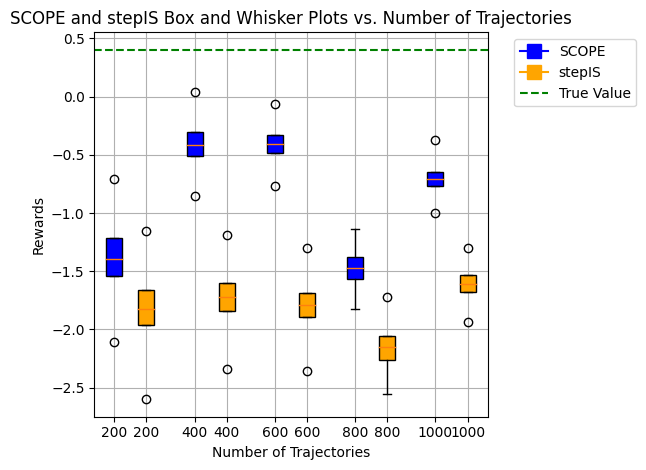

In [76]:
plot_rewards_over_trajectories(env_bad, num_trajectories, behav_policy, eval_policy, 0.3)

## Single bad region

In [163]:
num_trajectories = [200, 400, 600, 800, 1000]

In [78]:
env_bad_one = GridWorld(height, width, start, end, [(2, 2)], [], 0.5, -2, 3 )
eval_policy = {"up": 0.4, "down": 0.1, "left": 0.1, "right": 0.4}
behav_policy = {"up": 0.25, "down": 0.25, "left": 0.25, "right": 0.25}

In [212]:
for i in num_trajectories:
  run_experiment(env_bad_one,i ,behav_policy, eval_policy, 0.3)
  print(i," trajectories done")

Iteration: 1
Beta: [-0.04973507]
Variance Scope: 0.018989969928276604
----------
Var SCOPE_phi:  0.020868698126695406
Var IS_phi:  0.021951280966924468
Percent change in variance:  -4.931752465199026
SCOPE results:  {'std_deviation': 0.14450085569686189, 'quartiles': array([-0.62984529, -0.52638903, -0.43341522]), 'max_value': -0.09524971245941706, 'min_value': -0.8905554592015197}
IS results:  {'std_deviation': 0.1418548069198576, 'quartiles': array([-0.77785751, -0.6810903 , -0.59055079]), 'max_value': -0.2520653864163582, 'min_value': -1.0427255213522189}
true eval:  1.862
200  trajectories done
Iteration: 1
Beta: [0.11602648]
Variance Scope: 0.06723500616069068
----------
Var SCOPE_phi:  0.08315713312155568
Var IS_phi:  0.09943635987956832
Percent change in variance:  -16.37150311790287
SCOPE results:  {'std_deviation': 0.1282095265933588, 'quartiles': array([-1.1320494 , -1.03129478, -0.95132788]), 'max_value': -0.7287495789277596, 'min_value': -1.490669289965689}
IS results:  {'s

200  trajectories done
400  trajectories done
600  trajectories done
800  trajectories done
1000  trajectories done


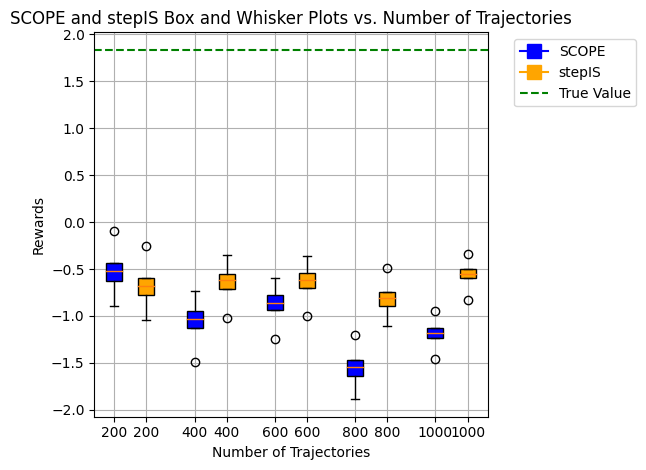

In [79]:
plot_rewards_over_trajectories(env_bad_one, num_trajectories ,behav_policy, eval_policy, 0.3)

## Two bad regions One good region

In [80]:
env_2bad_1good = GridWorld(height, width, start, end, [(1, 1), (2, 2)], [(3,3)], 0.5, -2, 3 )
eval_policy = {"up": 0.36, "down": 0.14, "left": 0.14, "right": 0.36}
behav_policy = {"up": 0.25, "down": 0.25, "left": 0.25, "right": 0.25}

In [ ]:
run_experiment(env_2bad_1good,200, behav_policy, eval_policy, 0.3)

In [31]:
num_trajectories = [200, 400, 600, 800, 1000]

In [35]:
for i in num_trajectories:
  run_experiment(env_2bad_1good,i ,behav_policy, eval_policy, 0.3)
  print(i," trajectories done")

Iteration: 1
Beta: [ 0.26936847  0.24418478 -0.13135848]
Variance Scope: 0.11355000414336157
----------
Iteration: 2
Beta: [ 0.17935921  0.27524364 -0.13902985]
Variance Scope: 0.09757997095395636
----------
Iteration: 3
Beta: [-0.11066584  0.37218671 -0.15931714]
Variance Scope: 0.07541270476310226
----------
Iteration: 4
Beta: [-0.11744076  0.35983304 -0.13910913]
Variance Scope: 0.07536247323110924
----------
Iteration: 5
Beta: [-0.13101001  0.33242693 -0.09488484]
Variance Scope: 0.07531777435219121
----------
Var SCOPE_phi:  0.08902138278335116
Var IS_phi:  0.14048159529280713
Percent change in variance:  -36.63128426339191
SCOPE results:  {'std_deviation': 0.16476672964322422, 'quartiles': array([-0.85525551, -0.7351853 , -0.63260107]), 'max_value': -0.28988122545184586, 'min_value': -1.200741774149905}
IS results:  {'std_deviation': 0.19171294333101496, 'quartiles': array([-1.56423915, -1.43010383, -1.31407239]), 'max_value': -0.947782831830442, 'min_value': -1.9790808157205657}

200  trajectories done
400  trajectories done
600  trajectories done
800  trajectories done
1000  trajectories done


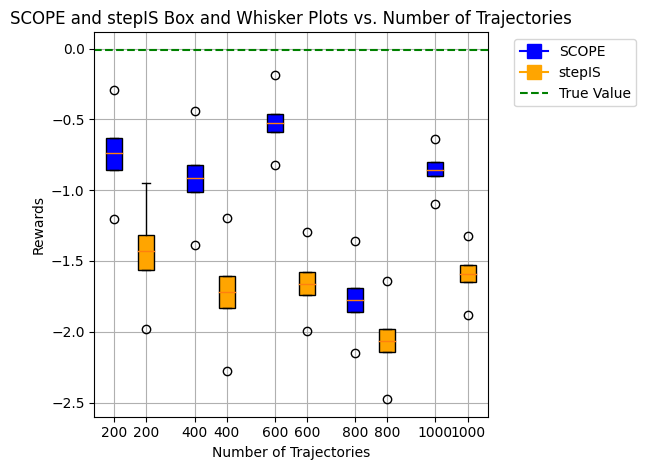

In [81]:
plot_rewards_over_trajectories(env_2bad_1good, num_trajectories, behav_policy, eval_policy, 0.3)

## Two bad regions One good region similar policies

In [82]:
env_2bad_1good_similar = GridWorld(height, width, start, end, [(1, 1), (2, 2)], [(3,3)], 0.5, -2, 3 )
behav_policy = {"up": 0.36, "down": 0.14, "left": 0.14, "right": 0.36}
eval_policy = {"up": 0.4, "down": 0.1, "left": 0.1, "right": 0.4}

In [53]:
for i in num_trajectories:
  run_experiment(env_2bad_1good_similar,i ,behav_policy, eval_policy, 0.3)
  print(i," trajectories done")

Iteration: 1
Beta: [ 0.30143726 -0.06019801  0.05688463]
Variance Scope: 0.05336077762322047
----------
Iteration: 2
Beta: [ 0.26478906 -0.02971116  0.04379661]
Variance Scope: 0.05247084306955816
----------
Iteration: 3
Beta: [ 0.13073205  0.1236133  -0.06288369]
Variance Scope: 0.050514952849214666
----------
Iteration: 4
Beta: [ 0.14055579  0.16232143 -0.12532001]
Variance Scope: 0.050219185966840586
----------
Iteration: 5
Beta: [ 0.34975277  0.52122925 -0.80026683]
Variance Scope: 0.04819615515703848
----------
Iteration: 6
Beta: [ 0.48981108  0.62337185 -1.0578198 ]
Variance Scope: 0.04777702772954364
----------
Iteration: 7
Beta: [ 0.5169212   0.62628667 -1.08396087]
Variance Scope: 0.04775633741557941
----------
Iteration: 8
Beta: [ 0.51665659  0.62345256 -1.07975931]
Variance Scope: 0.04775618014246681
----------
Var SCOPE_phi:  0.049685243621990775
Var IS_phi:  0.055655778345727436
Percent change in variance:  -10.727609785004478
SCOPE results:  {'std_deviation': 0.1250541748

200  trajectories done
400  trajectories done
600  trajectories done
800  trajectories done
1000  trajectories done


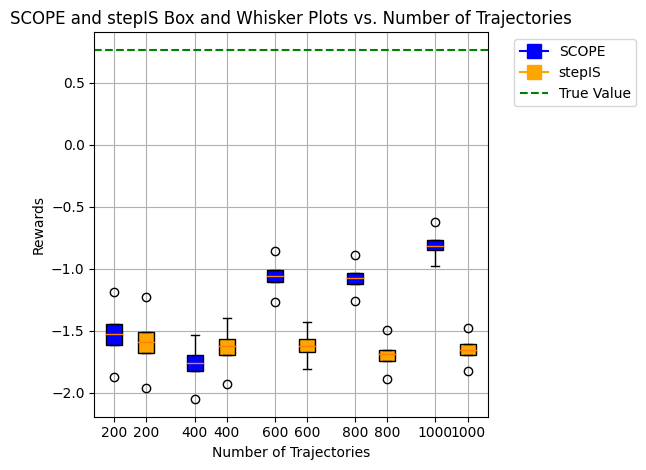

In [83]:
plot_rewards_over_trajectories(env_2bad_1good_similar, num_trajectories, behav_policy, eval_policy, 0.3)